# How to write a function

why writing  functions is useful, how to convert a script into a function, and what order to include the arguments.

## Why you should use functions

Functions eliminate repetition from your code, which
* can reduce your workload, and
* help avoid errors.
Functions also allow code reuse and sharing.

### libraries

In [73]:
library(dplyr)
library(readr)
library(assertive)
library(broom)
library(zeallot)
library(magrittr)
library(ggplot2)
library(mgcv)

In [2]:
gold_medals <- c(USA=46, GBR=27, CHN=26, RUS=19, GER=17, JPN=12,
                 FRA=10, KOR=9, ITA=8, AUS=8, NED=8, HUN=8,
                 BRA=7, ESP=7, KEN=6, JAM=6, CRO=5, CUB=5,NZL=4,  
                 CAN=4, UZB=4, KAZ=3, COL=3, SUI=3,
                 IRI=3, GRE=3, ARG=3, DEN=2, SWE=2, RSA=2,
                 UKR=2, SRB=2, POL=2,  PRK=2, BEL=2,THA=2,
                 SVK=2, GEO=2, AZE=1, BLR=1, TUR=1, ARM=1,
                 CZE=1, ETH=1, SLO=1, INA=1, ROU=1, BRN=1,
                 VIE=1, TPE=1, BAH=1, IOA=1, CIV=1, FIJ=1,
                 JOR=1, KOS=1, PUR=1, SIN=1, TJK=1, MAS=0,
                 MEX=0, VEN=0, ALG=0, IRL=0, LTU=0, BUL=0,
                 IND=0, MGL=0, BDI=0, GRN=0, NIG=0, PHI=0,
                 QAT=0, NOR=0, EGY=0, TUN=0, ISR=0, AUT=0,
                 DOM=0, EST=0, FIN=0, MAR=0, NGR=0, POR=0,
                 TTO=0, UAE=0, IOC=NA)

One way to make your code more readable is to be careful about the order you pass arguments when you call functions, and whether you pass the arguments by position or by name.

`gold_medals`, a numeric vector of the number of gold medals won by each country in the 2016 Summer Olympics, is provided.

The arguments of `median()` and `rank()` are displayed using `args()`. Setting `rank()`'s` na.last` argument to `"keep"` means `"keep the rank of NA values as NA"`.

Best practice for calling functions is to include them in the order shown by `args()`, and to only name rare arguments.

In [3]:
# Look at the gold medals data
gold_medals

# Note the arguments to median()
args(median)

# Rewrite this function call, following best practices
median(gold_medals, na.rm=TRUE)

USA GBR CHN RUS GER JPN FRA KOR ITA AUS NED HUN BRA ESP KEN JAM CRO CUB NZL CAN 
 46  27  26  19  17  12  10   9   8   8   8   8   7   7   6   6   5   5   4   4 
UZB KAZ COL SUI IRI GRE ARG DEN SWE RSA UKR SRB POL PRK BEL THA SVK GEO AZE BLR 
  4   3   3   3   3   3   3   2   2   2   2   2   2   2   2   2   2   2   1   1 
TUR ARM CZE ETH SLO INA ROU BRN VIE TPE BAH IOA CIV FIJ JOR KOS PUR SIN TJK MAS 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0 
MEX VEN ALG IRL LTU BUL IND MGL BDI GRN NIG PHI QAT NOR EGY TUN ISR AUT DOM EST 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
FIN MAR NGR POR TTO UAE IOC 
  0   0   0   0   0   0  NA

function (x, na.rm = FALSE, ...) 
NULL

[1] 1

In [4]:
# Note the arguments to rank()
args(rank)

# Rewrite this function call, following best practices
rank(-gold_medals, na.last="keep",ties.method="min")

function (x, na.last = TRUE, ties.method = c("average", "first", 
    "last", "random", "max", "min")) 
NULL

USA GBR CHN RUS GER JPN FRA KOR ITA AUS NED HUN BRA ESP KEN JAM CRO CUB NZL CAN 
  1   2   3   4   5   6   7   8   9   9   9   9  13  13  15  15  17  17  19  19 
UZB KAZ COL SUI IRI GRE ARG DEN SWE RSA UKR SRB POL PRK BEL THA SVK GEO AZE BLR 
 19  22  22  22  22  22  22  28  28  28  28  28  28  28  28  28  28  28  39  39 
TUR ARM CZE ETH SLO INA ROU BRN VIE TPE BAH IOA CIV FIJ JOR KOS PUR SIN TJK MAS 
 39  39  39  39  39  39  39  39  39  39  39  39  39  39  39  39  39  39  39  60 
MEX VEN ALG IRL LTU BUL IND MGL BDI GRN NIG PHI QAT NOR EGY TUN ISR AUT DOM EST 
 60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60 
FIN MAR NGR POR TTO UAE IOC 
 60  60  60  60  60  60  NA

### The benefits of writing functions

* You can type less code, saving effort and making your analyses more readable.

* You make less "copy and paste"-related errors.

* You can reuse your code from project to project.

## Converting scripts into functions

### Converting a script to a function

If you have a script and want to turn it into a function, there are several steps you should take.

* Make a template
* Paste in the script
* Choose the arguments
* Replace specific values with the arguments names
* Make specific variable names more general
* Remove a final assignment

### first function: tossing a coin

Simulates a single coin toss by using `sample()` to sample from `coin_sides` once.



In [5]:
coin_sides <- c("head", "tail")

# Sample from coin_sides once
sample(coin_sides, 1)

[1] "tail"

In [6]:
# Your functions, from previous steps
toss_coin <- function() {
  coin_sides <- c("head", "tail")
  sample(coin_sides, 1)
}

# Call your function
toss_coin()

[1] "tail"

### Inputs to functions

Most functions require some sort of input to determine what to compute. The inputs to functions are called **arguments**. You specify them inside the parentheses after the word "function."

We will be using `sample()` to do random sampling.

In [7]:
coin_sides <- c("head", "tail")
n_flips <- 10

# Sample from coin_sides n_flips times with replacement
sample(coin_sides, n_flips, replace=TRUE)

[1] "tail" "tail" "tail" "tail" "head" "tail" "tail" "head" "head" "head"

In [8]:
# Update the function to return n coin tosses
toss_coin <- function(n_flips) {
  coin_sides <- c("head", "tail")
  sample(coin_sides, n_flips, replace=TRUE)
}

# Generate 10 coin tosses
toss_coin(10)

[1] "tail" "head" "head" "head" "tail" "tail" "tail" "head" "tail" "tail"

The arguments to a function are specified inside the parentheses on the signature line.

### Multiple inputs to functions

If a function should have more than one argument, list them in the function signature, separated by commas.

We will Set the `prob` argument to a numeric vector with the same length as `x`. Each value of `prob` is the probability of sampling the corresponding element of `x`, so their values add up to one. In the following example, each sample has a `20%` chance of `"bat"`, a `30%` chance of `"cat"` and a `50%` chance of `"rat"`.

```python
sample(c("bat", "cat", "rat"), 10, replace = TRUE, prob = c(0.2, 0.3, 0.5))
```

In [9]:
coin_sides <- c("head", "tail")
n_flips <- 10
p_head <- 0.8

# Define a vector of weights
weights <- c(p_head, 1-p_head)

# Update so that heads are sampled with prob p_head
sample(coin_sides, n_flips, replace = TRUE, prob=weights)

[1] "tail" "head" "head" "head" "head" "head" "head" "head" "head" "head"

In [10]:
# Update the function so heads have probability p_head
toss_coin <- function(n_flips, p_head) {
  coin_sides <- c("head", "tail")
  # Define a vector of weights
  weights <- c(p_head, 1-p_head)
  # Modify the sampling to be weighted
  sample(coin_sides, n_flips, replace = TRUE, prob=weights)
}

# Generate 10 coin tosses
toss_coin(10, .8)

[1] "head" "tail" "tail" "head" "head" "head" "head" "tail" "head" "head"

When you have multiple arugments in the function signature, their names are separated by commas.

## Y kant I reed ur code?
Functions have 2 types of arguments:
* ***data arguments*** are what a function computes on, and 
* ***detail arguments*** advise on how the computation should be performed.

### Renaming GLM

R's generalized linear regression function, `glm()`, suffers the same usability problems as `lm()`: 
* its name is an acronym, and 
* its formula and data arguments are in the wrong order.

We need to know two things about generalized linear regression:

1. `glm()` formulas are specified like `lm()` formulas: 
  * response is on the left, and 
  * explanatory variables are added on the right.
2. To model count data, set `glm()`'s `famil`y argument to poisson, making it a Poisson regression.

Here We'll use data on the [number of yearly visits to Snake River](https://www.rdocumentation.org/packages/COUNT/topics/loomis) at Jackson Hole, Wyoming, `snake_river_visits`.

In [11]:
snake_river_visits <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5028/datasets/a55843f83746968c7f118d82ed727db9c71e891f/snake_river_visits.rds")))
head(snake_river_visits)

n_visits,gender,income,travel
0,male,"($95k,$Inf)",NA
0,male,"($25k,$55k]",NA
0,male,"($95k,$Inf)",NA
0,female,"($25k,$55k]",NA
0,male,"($95k,$Inf)",NA
0,female,"($25k,$55k]",NA


In [12]:
class(snake_river_visits)

[1] "data.frame"

In [13]:
# Run a generalized linear regression 
glm(
  # Model no. of visits vs. gender, income, travel
  n_visits ~ gender + income + travel, 
  # Use the snake_river_visits dataset
  data = snake_river_visits, 
  # Make it a Poisson regression
  family = poisson
)


Call:  glm(formula = n_visits ~ gender + income + travel, family = poisson, 
    data = snake_river_visits)

Coefficients:
      (Intercept)       genderfemale  income($25k,$55k]  income($55k,$95k]  
           4.0864             0.3740            -0.0199            -0.5807  
income($95k,$Inf)   travel(0.25h,4h]    travel(4h,Infh)  
          -0.5782            -0.6271            -2.4230  

Degrees of Freedom: 345 Total (i.e. Null);  339 Residual
  (64 observations deleted due to missingness)
Null Deviance:	    18850 
Residual Deviance: 11530 	AIC: 12860

In [14]:
# Write a function to run a Poisson regression
run_poisson_regression <- function (data, formula){
  glm(data=data, formula=formula, family=poisson)
}



In [15]:
snake_river_explanatory = read_csv("../datasets//snake_river_explanatory.csv", col_types="fff")
head(snake_river_explanatory)

gender,income,travel
male,"[$0,$25k]","[0h,0.25h]"
female,"[$0,$25k]","[0h,0.25h]"
male,"($25k,$55k]","[0h,0.25h]"
female,"($25k,$55k]","[0h,0.25h]"
male,"($55k,$95k]","[0h,0.25h]"
female,"($55k,$95k]","[0h,0.25h]"


In [16]:
str(snake_river_explanatory)

tibble [24 x 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ gender: Factor w/ 2 levels "male","female": 1 2 1 2 1 2 1 2 1 2 ...
 $ income: Factor w/ 4 levels "[$0,$25k]","($25k,$55k]",..: 1 1 2 2 3 3 4 4 1 1 ...
 $ travel: Factor w/ 3 levels "[0h,0.25h]","(0.25h,4h]",..: 1 1 1 1 1 1 1 1 2 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   gender = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   income = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   travel = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE)
  .. )


In [17]:
# Re-run the Poisson regression, using your function
model <- snake_river_visits %>%
  run_poisson_regression(n_visits ~ gender + income + travel)

# Run this to see the predictions
snake_river_explanatory %>%
  mutate(predicted_n_visits = predict(model, ., type = "response"))%>%
  arrange(desc(predicted_n_visits))

gender,income,travel,predicted_n_visits
female,"[$0,$25k]","[0h,0.25h]",86.518598
female,"($25k,$55k]","[0h,0.25h]",84.813684
male,"[$0,$25k]","[0h,0.25h]",59.524843
male,"($25k,$55k]","[0h,0.25h]",58.351861
female,"($95k,$Inf)","[0h,0.25h]",48.526883
female,"($55k,$95k]","[0h,0.25h]",48.408009
female,"[$0,$25k]","(0.25h,4h]",46.212343
female,"($25k,$55k]","(0.25h,4h]",45.301694
male,"($95k,$Inf)","[0h,0.25h]",33.386522
male,"($55k,$95k]","[0h,0.25h]",33.304737


Low-income females who live within 15 mins travel are predicted to visit Snake River over 80 times in a year!

# All about arguments

how to set defaults for arguments, how to pass arguments between functions, and how to check that users specified arguments correctly.

## Default arguments

### Numeric defaults

`cut_by_quantile()` converts a numeric vector into a categorical variable where quantiles define the cut points. 

A numeric vector of the number of visits to Snake River is provided as `n_visits`.

In [18]:
n_visits = snake_river_visits$n_visits
class(n_visits)

[1] "numeric"

In [19]:
# Set the default for n to 5
cut_by_quantile <- function(x, n=5, na.rm, labels, interval_type) {
  probs <- seq(0, 1, length.out = n + 1)
  qtiles <- quantile(x, probs, na.rm = na.rm, names = FALSE)
  right <- switch(interval_type, "(lo, hi]" = TRUE, "[lo, hi)" = FALSE)
  cut(x, qtiles, labels = labels, right = right, include.lowest = TRUE)
}

# Remove the n argument from the call
cut_by_quantile(
  n_visits, 
  na.rm = FALSE, 
  labels = c("very low", "low", "medium", "high", "very high"),
  interval_type = "(lo, hi]"
)

[1] very low  very low  very low  very low  very low  very low  very low 
  [8] very low  very low  very low  very low  very low  very low  very low 
 [15] very low  very low  very low  very low  very low  high      very high
 [22] high      very low  medium    low       very low  very low  very low 
 [29] very low  very low  very low  very high very high very high very high
 [36] very high high      very high very high very high very high very high
 [43] medium    very high very high very high medium    medium    low      
 [50] high      high      high      very high very high high      high     
 [57] very high medium    very high high      medium    high      very high
 [64] very high very high very high high      high      very high high     
 [71] very low  very high high      high      medium    high      high     
 [78] high      medium    very high very high very high high      high     
 [85] high      very low  very high medium    high      very high high     
 [92] high      very high high      very low  very low  medium    very low 
 [99] medium    medium    very high medium    medium    medium    high     
[106] low       high      very high medium    very high medium    very high
[113] low       very high low       very high high      very low  very low 
[120] very low  very low  low       very low  very low  very low  very low 
[127] very low  very low  medium    very low  very low  low       low      
[134] very low  very low  low       very low  very low  very low  low      
[141] low       medium    medium    medium    medium    medium    very low 
[148] very low  low       very low  low       medium    very low  very low 
[155] very low  very low  very high high      very high high      medium   
[162] very high medium    very low  high      medium    high      high     
[169] very high high      high      very high very high high      very high
[176] high      high      medium    very high high      high      high     
[183] very high very high very low  high      very high high      high     
[190] medium    very high high      very high high      very high high     
[197] very high high      very high very low  high      very high very high
[204] very low  very low  medium    very high medium    low       medium   
[211] high      medium    very low  medium    very high high      very high
[218] high      very high high      low       high      medium    very high
[225] medium    high      high      high      very low  high      high     
[232] high      very high high      medium    medium    very low  very low 
[239] very low  very low  medium    low       very low  very low  very low 
[246] medium    high      very low  very low  medium    very low  very low 
[253] very low  very low  very low  very low  very low  very low  very low 
[260] very low  very high medium    very low  very high medium    very high
[267] medium    low       very high medium    medium    medium    low      
[274] high      medium    high      very high medium    very high very high
[281] medium    medium    very high high      medium    very high high     
[288] medium    low       very low  medium    very low  very low  very low 
[295] very low  very low  low       very low  very low  very low  very low 
[302] very low  very low  very low  very low  low       very low  very low 
[309] very low  very low  low       very low  very low  low       very low 
[316] very low  very low  very low  low       very low  very low  very low 
[323] very low  very low  low       very low  very low  very low  very low 
[330] very low  very low  very low  very low  very low  very low  very low 
[337] very low  very low  very low  very low  very low  very low  very low 
[344] very low  very low  medium    very low  very low  very low  very low 
[351] very low  very low  very low  very low  very low  very low  very low 
[358] very low  low       very low  very low  very low  very low  very low 
[365] very low  very low  very low  very low  very

 > Warning: Remember to only set defaults for numeric detail arguments, not data arguments.
 
 ### Logical defaults
 
 `cut_by_quantile()` is now slightly easier to use, but we still always have to specify the `na.rm` argument. This removes missing values – it behaves the same as the `na.rm` argument to `mean()` or `sd()`.

Where functions have an argument for removing missing values, the best practice is to **not** remove them by default (in case we hadn't spotted that we had missing values). That means that the default for `na.rm` should be `FALSE`.

In [20]:
# Set the default for na.rm to FALSE
cut_by_quantile <- function(x, n = 5, na.rm=FALSE, labels, interval_type) {
  probs <- seq(0, 1, length.out = n + 1)
  qtiles <- quantile(x, probs, na.rm = na.rm, names = FALSE)
  right <- switch(interval_type, "(lo, hi]" = TRUE, "[lo, hi)" = FALSE)
  cut(x, qtiles, labels = labels, right = right, include.lowest = TRUE)
}

# Remove the na.rm argument from the call
cut_by_quantile(
  n_visits, 
  labels = c("very low", "low", "medium", "high", "very high"),
  interval_type = "(lo, hi]"
)

[1] very low  very low  very low  very low  very low  very low  very low 
  [8] very low  very low  very low  very low  very low  very low  very low 
 [15] very low  very low  very low  very low  very low  high      very high
 [22] high      very low  medium    low       very low  very low  very low 
 [29] very low  very low  very low  very high very high very high very high
 [36] very high high      very high very high very high very high very high
 [43] medium    very high very high very high medium    medium    low      
 [50] high      high      high      very high very high high      high     
 [57] very high medium    very high high      medium    high      very high
 [64] very high very high very high high      high      very high high     
 [71] very low  very high high      high      medium    high      high     
 [78] high      medium    very high very high very high high      high     
 [85] high      very low  very high medium    high      very high high     
 [92] high      very high high      very low  very low  medium    very low 
 [99] medium    medium    very high medium    medium    medium    high     
[106] low       high      very high medium    very high medium    very high
[113] low       very high low       very high high      very low  very low 
[120] very low  very low  low       very low  very low  very low  very low 
[127] very low  very low  medium    very low  very low  low       low      
[134] very low  very low  low       very low  very low  very low  low      
[141] low       medium    medium    medium    medium    medium    very low 
[148] very low  low       very low  low       medium    very low  very low 
[155] very low  very low  very high high      very high high      medium   
[162] very high medium    very low  high      medium    high      high     
[169] very high high      high      very high very high high      very high
[176] high      high      medium    very high high      high      high     
[183] very high very high very low  high      very high high      high     
[190] medium    very high high      very high high      very high high     
[197] very high high      very high very low  high      very high very high
[204] very low  very low  medium    very high medium    low       medium   
[211] high      medium    very low  medium    very high high      very high
[218] high      very high high      low       high      medium    very high
[225] medium    high      high      high      very low  high      high     
[232] high      very high high      medium    medium    very low  very low 
[239] very low  very low  medium    low       very low  very low  very low 
[246] medium    high      very low  very low  medium    very low  very low 
[253] very low  very low  very low  very low  very low  very low  very low 
[260] very low  very high medium    very low  very high medium    very high
[267] medium    low       very high medium    medium    medium    low      
[274] high      medium    high      very high medium    very high very high
[281] medium    medium    very high high      medium    very high high     
[288] medium    low       very low  medium    very low  very low  very low 
[295] very low  very low  low       very low  very low  very low  very low 
[302] very low  very low  very low  very low  low       very low  very low 
[309] very low  very low  low       very low  very low  low       very low 
[316] very low  very low  very low  low       very low  very low  very low 
[323] very low  very low  low       very low  very low  very low  very low 
[330] very low  very low  very low  very low  very low  very low  very low 
[337] very low  very low  very low  very low  very low  very low  very low 
[344] very low  very low  medium    very low  very low  very low  very low 
[351] very low  very low  very low  very low  very low  very low  very low 
[358] very low  low       very low  very low  very low  very low  very low 
[365] very low  very low  very low  very low  very

> Important: For most variable types, you can just set a default using arg = default_value in the function signature.

### NULL defaults

The `cut()` function used by `cut_by_quantile()` can automatically provide sensible labels for each category. The code to generate these labels is [pretty complicated](https://github.com/wch/r-source/blob/29a9e663a2352843a6ea26b259725b0b97d0e4bd/src/library/base/R/cut.R#L42-L60), so rather than appearing in the function signature directly, its `labels` argument defaults to `NULL`, and the calculation details are shown on the [?cut](https://www.rdocumentation.org/packages/base/topics/cut) help page.

In [21]:
# Set the default for labels to NULL
cut_by_quantile <- function(x, n = 5, na.rm = FALSE, labels=NULL, interval_type) {
  probs <- seq(0, 1, length.out = n + 1)
  qtiles <- quantile(x, probs, na.rm = na.rm, names = FALSE)
  right <- switch(interval_type, "(lo, hi]" = TRUE, "[lo, hi)" = FALSE)
  cut(x, qtiles, labels = labels, right = right, include.lowest = TRUE)
}

# Remove the labels argument from the call
cut_by_quantile(
  n_visits,
  interval_type = "(lo, hi]"
)

[1] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
  [9] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
 [17] [0,1]    [0,1]    [0,1]    (10,35]  (35,350] (10,35]  [0,1]    (2,10]  
 [25] (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    (35,350]
 [33] (35,350] (35,350] (35,350] (35,350] (10,35]  (35,350] (35,350] (35,350]
 [41] (35,350] (35,350] (2,10]   (35,350] (35,350] (35,350] (2,10]   (2,10]  
 [49] (1,2]    (10,35]  (10,35]  (10,35]  (35,350] (35,350] (10,35]  (10,35] 
 [57] (35,350] (2,10]   (35,350] (10,35]  (2,10]   (10,35]  (35,350] (35,350]
 [65] (35,350] (35,350] (10,35]  (10,35]  (35,350] (10,35]  [0,1]    (35,350]
 [73] (10,35]  (10,35]  (2,10]   (10,35]  (10,35]  (10,35]  (2,10]   (35,350]
 [81] (35,350] (35,350] (10,35]  (10,35]  (10,35]  [0,1]    (35,350] (2,10]  
 [89] (10,35]  (35,350] (10,35]  (10,35]  (35,350] (10,35]  [0,1]    [0,1]   
 [97] (2,10]   [0,1]    (2,10]   (2,10]   (35,350] (2,10]   (2,10]   (2,10]  
[105] (10,35]  (1,2]    (10,35]  (35,350] (2,10]   (35,350] (2,10]   (35,350]
[113] (1,2]    (35,350] (1,2]    (35,350] (10,35]  [0,1]    [0,1]    [0,1]   
[121] [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[129] (2,10]   [0,1]    [0,1]    (1,2]    (1,2]    [0,1]    [0,1]    (1,2]   
[137] [0,1]    [0,1]    [0,1]    (1,2]    (1,2]    (2,10]   (2,10]   (2,10]  
[145] (2,10]   (2,10]   [0,1]    [0,1]    (1,2]    [0,1]    (1,2]    (2,10]  
[153] [0,1]    [0,1]    [0,1]    [0,1]    (35,350] (10,35]  (35,350] (10,35] 
[161] (2,10]   (35,350] (2,10]   [0,1]    (10,35]  (2,10]   (10,35]  (10,35] 
[169] (35,350] (10,35]  (10,35]  (35,350] (35,350] (10,35]  (35,350] (10,35] 
[177] (10,35]  (2,10]   (35,350] (10,35]  (10,35]  (10,35]  (35,350] (35,350]
[185] [0,1]    (10,35]  (35,350] (10,35]  (10,35]  (2,10]   (35,350] (10,35] 
[193] (35,350] (10,35]  (35,350] (10,35]  (35,350] (10,35]  (35,350] [0,1]   
[201] (10,35]  (35,350] (35,350] [0,1]    [0,1]    (2,10]   (35,350] (2,10]  
[209] (1,2]    (2,10]   (10,35]  (2,10]   [0,1]    (2,10]   (35,350] (10,35] 
[217] (35,350] (10,35]  (35,350] (10,35]  (1,2]    (10,35]  (2,10]   (35,350]
[225] (2,10]   (10,35]  (10,35]  (10,35]  [0,1]    (10,35]  (10,35]  (10,35] 
[233] (35,350] (10,35]  (2,10]   (2,10]   [0,1]    [0,1]    [0,1]    [0,1]   
[241] (2,10]   (1,2]    [0,1]    [0,1]    [0,1]    (2,10]   (10,35]  [0,1]   
[249] [0,1]    (2,10]   [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[257] [0,1]    [0,1]    [0,1]    [0,1]    (35,350] (2,10]   [0,1]    (35,350]
[265] (2,10]   (35,350] (2,10]   (1,2]    (35,350] (2,10]   (2,10]   (2,10]  
[273] (1,2]    (10,35]  (2,10]   (10,35]  (35,350] (2,10]   (35,350] (35,350]
[281] (2,10]   (2,10]   (35,350] (10,35]  (2,10]   (35,350] (10,35]  (2,10]  
[289] (1,2]    [0,1]    (2,10]   [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[297] (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[305] [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]   
[313] [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]   
[321] [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]    [0,1]    [0,1]   
[329] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[337] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[345] [0,1]    (2,10]   [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[353] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]   
[361] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[369] [0,1]    [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    (35,350] (10,35] 
[377] (35,350] (35,350] (35,350] (10,35]  (35,350] (35,350] (35,350] (35,350]
[385] (2,10]   (2,10]   (2,10]   (10,35]  (35,350] (10,35]  (10,35]  (10,35] 
[393] (10,35]  (10,35]  (10,35]  (10,35]  (35,350] (10,35]  (35,350] (2,10]  
[401] (10,35]  (1,2]    (10,35]  (35,350] (1,2]    [0,1]    (2,10]   [0,1]   
[409] (2,10]   (1,2]   


> Tip: If you use this capability, make sure to document how the argument behaves in the function's help page.

### Categorical defaults

When cutting up a numeric vector, we need to worry about what happens if a value lands exactly on a boundary. We can either put this value into a category of the lower interval or the higher interval. That is, we can choose our intervals to include values at the top boundary but not the bottom (in mathematical terminology, "open on the left, closed on the right", or `(lo, hi])`. Or we can choose the opposite ("closed on the left, open on the right", or `[lo, hi)`). cut_by_quantile() should allow these two choices.

The pattern for categorical defaults is:

```python
function(cat_arg = c("choice1", "choice2")) {
  cat_arg <- match.arg(cat_arg)
}
```

In [22]:
# Set the categories for interval_type to "(lo, hi]" and "[lo, hi)"
cut_by_quantile <- function(x, n = 5, na.rm = FALSE, labels = NULL, 
                            interval_type = c("(lo, hi]", "[lo, hi)") ){
  # Match the interval_type argument
  interval_type <- match.arg(interval_type)
  probs <- seq(0, 1, length.out = n + 1)
  qtiles <- quantile(x, probs, na.rm = na.rm, names = FALSE)
  right <- switch(interval_type, "(lo, hi]" = TRUE, "[lo, hi)" = FALSE)
  cut(x, qtiles, labels = labels, right = right, include.lowest = TRUE)
}

# Remove the interval_type argument from the call
cut_by_quantile(n_visits)

[1] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
  [9] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
 [17] [0,1]    [0,1]    [0,1]    (10,35]  (35,350] (10,35]  [0,1]    (2,10]  
 [25] (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    (35,350]
 [33] (35,350] (35,350] (35,350] (35,350] (10,35]  (35,350] (35,350] (35,350]
 [41] (35,350] (35,350] (2,10]   (35,350] (35,350] (35,350] (2,10]   (2,10]  
 [49] (1,2]    (10,35]  (10,35]  (10,35]  (35,350] (35,350] (10,35]  (10,35] 
 [57] (35,350] (2,10]   (35,350] (10,35]  (2,10]   (10,35]  (35,350] (35,350]
 [65] (35,350] (35,350] (10,35]  (10,35]  (35,350] (10,35]  [0,1]    (35,350]
 [73] (10,35]  (10,35]  (2,10]   (10,35]  (10,35]  (10,35]  (2,10]   (35,350]
 [81] (35,350] (35,350] (10,35]  (10,35]  (10,35]  [0,1]    (35,350] (2,10]  
 [89] (10,35]  (35,350] (10,35]  (10,35]  (35,350] (10,35]  [0,1]    [0,1]   
 [97] (2,10]   [0,1]    (2,10]   (2,10]   (35,350] (2,10]   (2,10]   (2,10]  
[105] (10,35]  (1,2]    (10,35]  (35,350] (2,10]   (35,350] (2,10]   (35,350]
[113] (1,2]    (35,350] (1,2]    (35,350] (10,35]  [0,1]    [0,1]    [0,1]   
[121] [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[129] (2,10]   [0,1]    [0,1]    (1,2]    (1,2]    [0,1]    [0,1]    (1,2]   
[137] [0,1]    [0,1]    [0,1]    (1,2]    (1,2]    (2,10]   (2,10]   (2,10]  
[145] (2,10]   (2,10]   [0,1]    [0,1]    (1,2]    [0,1]    (1,2]    (2,10]  
[153] [0,1]    [0,1]    [0,1]    [0,1]    (35,350] (10,35]  (35,350] (10,35] 
[161] (2,10]   (35,350] (2,10]   [0,1]    (10,35]  (2,10]   (10,35]  (10,35] 
[169] (35,350] (10,35]  (10,35]  (35,350] (35,350] (10,35]  (35,350] (10,35] 
[177] (10,35]  (2,10]   (35,350] (10,35]  (10,35]  (10,35]  (35,350] (35,350]
[185] [0,1]    (10,35]  (35,350] (10,35]  (10,35]  (2,10]   (35,350] (10,35] 
[193] (35,350] (10,35]  (35,350] (10,35]  (35,350] (10,35]  (35,350] [0,1]   
[201] (10,35]  (35,350] (35,350] [0,1]    [0,1]    (2,10]   (35,350] (2,10]  
[209] (1,2]    (2,10]   (10,35]  (2,10]   [0,1]    (2,10]   (35,350] (10,35] 
[217] (35,350] (10,35]  (35,350] (10,35]  (1,2]    (10,35]  (2,10]   (35,350]
[225] (2,10]   (10,35]  (10,35]  (10,35]  [0,1]    (10,35]  (10,35]  (10,35] 
[233] (35,350] (10,35]  (2,10]   (2,10]   [0,1]    [0,1]    [0,1]    [0,1]   
[241] (2,10]   (1,2]    [0,1]    [0,1]    [0,1]    (2,10]   (10,35]  [0,1]   
[249] [0,1]    (2,10]   [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[257] [0,1]    [0,1]    [0,1]    [0,1]    (35,350] (2,10]   [0,1]    (35,350]
[265] (2,10]   (35,350] (2,10]   (1,2]    (35,350] (2,10]   (2,10]   (2,10]  
[273] (1,2]    (10,35]  (2,10]   (10,35]  (35,350] (2,10]   (35,350] (35,350]
[281] (2,10]   (2,10]   (35,350] (10,35]  (2,10]   (35,350] (10,35]  (2,10]  
[289] (1,2]    [0,1]    (2,10]   [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[297] (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[305] [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]   
[313] [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]   
[321] [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]    [0,1]    [0,1]   
[329] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[337] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[345] [0,1]    (2,10]   [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[353] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    (1,2]    [0,1]   
[361] [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]    [0,1]   
[369] [0,1]    [0,1]    (1,2]    [0,1]    [0,1]    [0,1]    (35,350] (10,35] 
[377] (35,350] (35,350] (35,350] (10,35]  (35,350] (35,350] (35,350] (35,350]
[385] (2,10]   (2,10]   (2,10]   (10,35]  (35,350] (10,35]  (10,35]  (10,35] 
[393] (10,35]  (10,35]  (10,35]  (10,35]  (35,350] (10,35]  (35,350] (2,10]  
[401] (10,35]  (1,2]    (10,35]  (35,350] (1,2]    [0,1]    (2,10]   [0,1]   
[409] (2,10]   (1,2]   


> Tip: `match.arg()` handles throwing an error if the user types a value that wasn't specified.

## Passing arguments between functions

### Harmonic mean

The harmonic mean is the reciprocal of the arithmetic mean of the reciprocal of the data. That is

$$harmonic\_mean(x)=1/(arithmetic\_mean(1/x)$$

The harmonic mean is often used to average ratio data. we'll be using it on the price/earnings ratio of stocks in the Standard and Poor's 500 index, provided as `std_and_poor500`. Price/earnings ratio is a measure of how expensive a stock is.

In [23]:
std_and_poor500 <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5028/datasets/675d6348dbcc81bcb4bb9d25e827f5b63d034771/std_and_poor500_with_pe_2019-06-21.rds")))
head(std_and_poor500)

symbol,company,sector,industry,pe_ratio
MMM,3M Company,Industrials,Industrial Conglomerates,18.31678
ABT,Abbott Laboratories,Health Care,Health Care Equipment,57.66621
ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,22.43805
ABMD,ABIOMED Inc,Health Care,Health Care Equipment,45.63993
ACN,Accenture plc,Information Technology,IT Consulting & Other Services,27.00233
ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,20.13596


In [24]:
# Look at the Standard and Poor 500 data
glimpse(std_and_poor500)

# Write a function to calculate the reciprocal
get_reciprocal <- function(x) {
  1/x
}

Rows: 505
Columns: 5
$ symbol   <chr> "MMM", "ABT", "ABBV", "ABMD", "ACN", "ATVI", "ADBE", "AMD"...
$ company  <chr> "3M Company", "Abbott Laboratories", "AbbVie Inc.", "ABIOM...
$ sector   <chr> "Industrials", "Health Care", "Health Care", "Health Care"...
$ industry <chr> "Industrial Conglomerates", "Health Care Equipment", "Phar...
$ pe_ratio <dbl> 18.31678, 57.66621, 22.43805, 45.63993, 27.00233, 20.13596...


In [25]:
# Write a function to calculate the harmonic mean
calc_harmonic_mean <- function(x) {
  x %>%
    get_reciprocal() %>%
    mean() %>%
    get_reciprocal()
}

In [26]:
std_and_poor500 %>% 
  # Group by sector
  group_by(sector) %>% 
  # Summarize, calculating harmonic mean of P/E ratio
  summarize(hmean_pe_ratio = calc_harmonic_mean(pe_ratio))

`summarise()` ungrouping output (override with `.groups` argument)


sector,hmean_pe_ratio
Communication Services,NA
Consumer Discretionary,NA
Consumer Staples,NA
Energy,NA
Financials,NA
Health Care,NA
Industrials,NA
Information Technology,NA
Materials,NA
Real Estate,32.50105


It looks like we have a problem though: most sectors have missing values.

## Dealing with missing values

It would be useful for our function to be able to remove missing values before calculating. Rather than writing our own code for this, we can outsource this functionality to `mean()`.

In [27]:
# Add an na.rm arg with a default, and pass it to mean()
calc_harmonic_mean <- function(x, na.rm=FALSE) {
  x %>%
    get_reciprocal() %>%
    mean(na.rm=na.rm) %>%
    get_reciprocal()
}

In [28]:
std_and_poor500 %>% 
  # Group by sector
  group_by(sector) %>% 
  # Summarize, calculating harmonic mean of P/E ratio
  summarize(hmean_pe_ratio = calc_harmonic_mean(pe_ratio, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)


sector,hmean_pe_ratio
Communication Services,17.51679
Consumer Discretionary,15.20211
Consumer Staples,19.78760
Energy,13.74589
Financials,12.86337
Health Care,26.57289
Industrials,18.17022
Information Technology,21.56407
Materials,16.30492
Real Estate,32.50105


Using this metric, Real Estate is by far the most expensive sector.

### Passing arguments with ...

Rather than explicitly giving `calc_harmonic_mean()` and `na.rm` argument, we can use `...` to simply "pass other arguments" to `mean()`.

In [29]:
# Swap na.rm arg for ... in signature and body
calc_harmonic_mean <- function(x, ...) {
  x %>%
    get_reciprocal() %>%
    mean(...) %>%
    get_reciprocal()
}

In [30]:
std_and_poor500 %>% 
  # Group by sector
  group_by(sector) %>% 
  # Summarize, calculating harmonic mean of P/E ratio
  summarize(hmean_pe_ratio = calc_harmonic_mean(pe_ratio, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)


sector,hmean_pe_ratio
Communication Services,17.51679
Consumer Discretionary,15.20211
Consumer Staples,19.78760
Energy,13.74589
Financials,12.86337
Health Care,26.57289
Industrials,18.17022
Information Technology,21.56407
Materials,16.30492
Real Estate,32.50105


 Using ... doesn't change how people use your function; it just means the function is more flexible. Whether flexible means better (or not) is up to you to decide.
 
 ## Checking arguments

### Throwing errors with bad arguments

If a user provides a bad input to a function, the best course of action is to throw an error letting them know. The two rules are

* Throw the error message as soon as you realize there is a problem (typically at the start of the function).
* Make the error message easily understandable.

We can use the `assert_*()` functions from assertive to check inputs and throw errors when they fail.

In [31]:
calc_harmonic_mean <- function(x, na.rm = FALSE) {
  # Assert that x is numeric
  assert_is_numeric(x)
  x %>%
    get_reciprocal() %>%
    mean(na.rm = na.rm) %>%
    get_reciprocal()
}

# See what happens when you pass it strings
calc_harmonic_mean(std_and_poor500$sector)

ERROR: Error in calc_harmonic_mean(std_and_poor500$sector): is_numeric : x is not of class 'numeric'; it has class 'character'.


Providing human-readable error messages is important when users are humans!

### Custom error logic

Sometimes the `assert_*()` functions in `assertive` don't give the most informative error message. For example, the assertions that check if a number is in a numeric range will tell the user that a value is out of range, but the won't say why that's a problem. In that case, we can use the `is_*()` functions in conjunction with messages, warnings, or errors to define custom feedback.

The harmonic mean only makes sense when `x` has all positive values. 

In [32]:
calc_harmonic_mean <- function(x, na.rm = FALSE) {
  assert_is_numeric(x)
  # Check if any values of x are non-positive
  if(any(is_non_positive(x), na.rm = TRUE)) {
    # Throw an error
    stop("x contains non-positive values, so the harmonic mean makes no sense.")
  }
  x %>%
    get_reciprocal() %>%
    mean(na.rm = na.rm) %>%
    get_reciprocal()
}

# See what happens when you pass it negative numbers
calc_harmonic_mean(std_and_poor500$pe_ratio - 20)

ERROR: Error in calc_harmonic_mean(std_and_poor500$pe_ratio - 20): x contains non-positive values, so the harmonic mean makes no sense.


Explaining what went wrong is helpful to users. Explaining why it is wrong is even better!

### Fixing function arguments

The harmonic mean function is almost complete. However, we still need to provide some checks on the `na.rm` argument. This time, rather than throwing errors when the input is in an incorrect form, we are going to try to fix it.

`na.rm` should be a logical vector with one element (that is, `TRUE`, or `FALSE`).

In [33]:
# Update the function definition to fix the na.rm argument
calc_harmonic_mean <- function(x, na.rm = FALSE) {
  assert_is_numeric(x)
  if(any(is_non_positive(x), na.rm = TRUE)) {
    stop("x contains non-positive values, so the harmonic mean makes no sense.")
  }
  # Use the first value of na.rm, and coerce to logical
  na.rm <- coerce_to(use_first(na.rm), target_class = "logical")
  x %>%
    get_reciprocal() %>%
    mean(na.rm = na.rm) %>%
    get_reciprocal()
}

# See what happens when you pass it malformed na.rm
calc_harmonic_mean(std_and_poor500$pe_ratio, na.rm = 1:5)

Warning message:
"Only the first value of na.rm (= 1) will be used."Warning message:
"Coercing use_first(na.rm) to class 'logical'."

[1] 18.23871

For small problems with inputs, it can be better to fix things rather than throwing an error.

# Return values and scope

return early from a function, how to return multiple values, and  how R decides which variables exist.

## Returning values from functions

### Returning early

Sometimes, you don't need to run through the whole body of a function to get the answer. In that case you can return early from that function using `return()`.

In [34]:
is_leap_year <- function(year) {
  # If year is div. by 400 return TRUE
  if(year %% 400 == 0) {
    return(TRUE)
  }
  # If year is div. by 100 return FALSE
  if(year %% 100 == 0) {
    return(FALSE)
  }  
  # If year is div. by 4 return TRUE
  if(year%%4==0){
    return(TRUE)
  }
  
  
  # Otherwise return FALSE
  FALSE
}

> Tip: Returning early can often improve the performance of your functions considerably for some input values.

### Returning invisibly

When the main purpose of a function is to generate output, like drawing a plot or printing something in the console, you may not want a return value to be printed as well. In that case, the value should be [invisibly returned](https://www.rdocumentation.org/packages/base/topics/invisible).

NULL

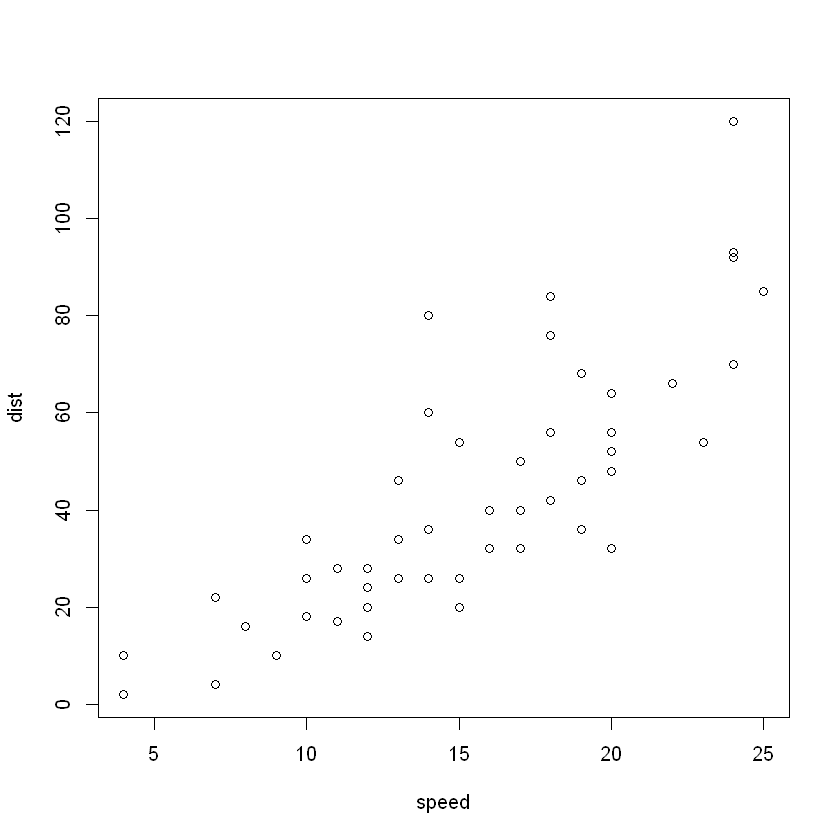

In [35]:
# Using cars, draw a scatter plot of dist vs. speed
plt_dist_vs_speed <- plot(dist ~ speed, data = cars)

# Oh no! The plot object is NULL
plt_dist_vs_speed

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10
10,18
10,26
10,34
11,17


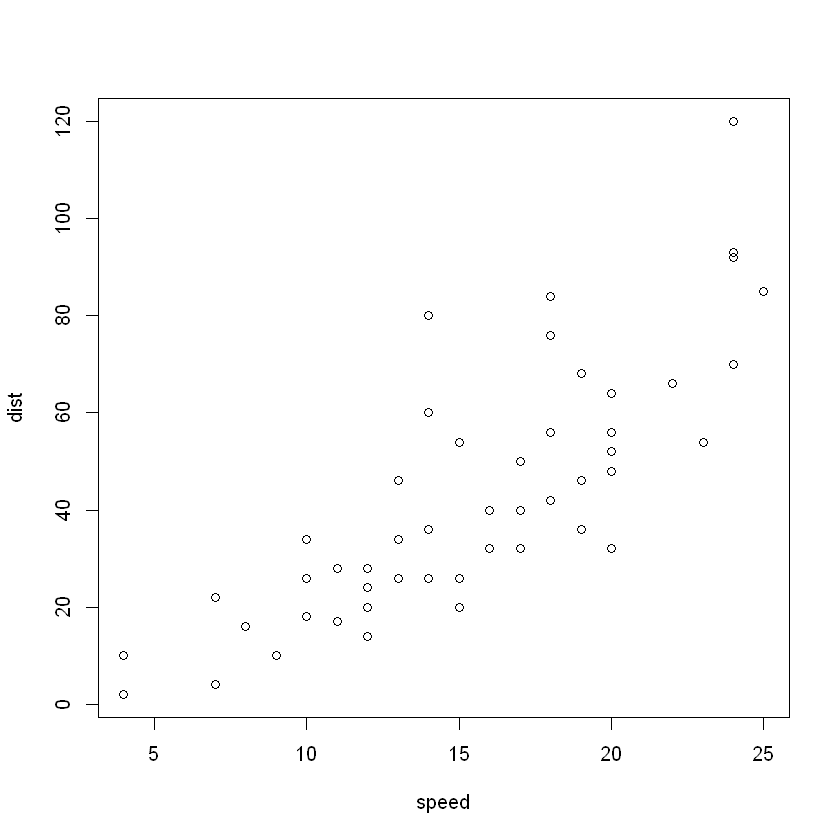

In [36]:
# Define a pipeable plot fn with data and formula args
pipeable_plot <- function(data, formula) {
  # Call plot() with the formula interface
  plot(formula,data=data)
  # Invisibly return the input dataset
  invisible(data)
}

# Draw the scatter plot of dist vs. speed again
plt_dist_vs_speed <- cars %>% 
  pipeable_plot(formula=dist ~ speed)

# Now the plot object has a value
plt_dist_vs_speed

> Important: Return values are usually desirable (so you can use the objects in later code), even if you don't want them printing to the console.

## Returning multiple values from functions

### Returning many things

Functions can only return one value. If you want to return multiple things, then you can store them all in a list.

If users want to have the list items as separate variables, they can assign each list element to its own variable using zeallot's multi-assignment operator, `%<-%`.

`glance()`, `tidy()`, and `augment()` each take the model object as their only argument.

In [37]:
# Look at the structure of model (it's a mess!)
str(model)

# Use broom tools to get a list of 3 data frames
list(
  # Get model-level values
  model = glance(model),
  # Get coefficient-level values
  coefficients = tidy(model),
  # Get observation-level values
  observations = augment(model)
)

List of 31
 $ coefficients     : Named num [1:7] 4.0864 0.374 -0.0199 -0.5807 -0.5782 ...
  ..- attr(*, "names")= chr [1:7] "(Intercept)" "genderfemale" "income($25k,$55k]" "income($55k,$95k]" ...
 $ residuals        : Named num [1:346] -0.535 -0.768 -0.944 -0.662 -0.767 ...
  ..- attr(*, "names")= chr [1:346] "25" "26" "27" "29" ...
 $ fitted.values    : Named num [1:346] 4.3 4.3 17.83 2.96 4.29 ...
  ..- attr(*, "names")= chr [1:346] "25" "26" "27" "29" ...
 $ effects          : Named num [1:346] -360 -29.2 20.3 -10 23.4 ...
  ..- attr(*, "names")= chr [1:346] "(Intercept)" "genderfemale" "income($25k,$55k]" "income($55k,$95k]" ...
 $ R                : num [1:7, 1:7] -97.4 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "(Intercept)" "genderfemale" "income($25k,$55k]" "income($55k,$95k]" ...
  .. ..$ : chr [1:7] "(Intercept)" "genderfemale" "income($25k,$55k]" "income($55k,$95k]" ...
 $ rank             : int 7
 $ qr               :List of 5
  ..$ qr   : num [1:

$model
# A tibble: 1 x 7
  null.deviance df.null logLik    AIC    BIC deviance df.residual
          <dbl>   <int>  <dbl>  <dbl>  <dbl>    <dbl>       <int>
1        18850.     345 -6425. 12864. 12891.   11529.         339

$coefficients
# A tibble: 7 x 5
  term              estimate std.error statistic   p.value
  <chr>                <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)         4.09      0.0279   146.    0.       
2 genderfemale        0.374     0.0212    17.6   2.18e- 69
3 income($25k,$55k]  -0.0199    0.0267    -0.746 4.56e-  1
4 income($55k,$95k]  -0.581     0.0343   -16.9   3.28e- 64
5 income($95k,$Inf)  -0.578     0.0310   -18.7   6.88e- 78
6 travel(0.25h,4h]   -0.627     0.0217   -28.8   5.40e-183
7 travel(4h,Infh)    -2.42      0.0492   -49.3   0.       

$observations
# A tibble: 346 x 12
   .rownames n_visits gender income travel .fitted .se.fit  .resid    .hat
   <chr>        <dbl> <fct>  <fct>  <fct>    <dbl>   <dbl>   <dbl>   <dbl>
 1 25               2 female ($95k~ (4h,I~    1.46  0.0502  -1.24  0.0109 
 2 26               1 female ($95k~ (4h,I~    1.46  0.0502  -1.92  0.0109 
 3 27               1 male   ($95k~ (0.25~    2.88  0.0269  -5.28  0.0129 
 4 29               1 male   ($95k~ (4h,I~    1.09  0.0490  -1.32  0.00711
 5 30               1 female ($55k~ (4h,I~    1.46  0.0531  -1.92  0.0121 
 6 31               1 male   [$0,$~ [0h,0~    4.09  0.0279 -10.4   0.0465 
 7 33              80 female [$0,$~ [0h,0~    4.46  0.0235  -0.710 0.0479 
 8 34             104 female ($95k~ [0h,0~    3.88  0.0261   6.90  0.0332 
 9 35              55 male   ($25k~ (0.25~    3.44  0.0222   3.85  0.0153 
10 36             350 female ($25k~ [0h,0~    4.44  0.0206  21.5   0.0360 
# ... with 336 more rows, and 3 more variables: .sigma <dbl>, .cooksd <dbl>,
#   .std.resid <dbl>

In [38]:
# Wrap this code into a function, groom_model
groom_model <- function(model){
  list(
    model = glance(model),
    coefficients = tidy(model),
    observations = augment(model)
  )
}

In [39]:
# Call groom_model on model, assigning to 3 variables
c(mdl, cff, obs) %<-% groom_model(model)

# See these individual variables
mdl; cff; obs

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
18850.48,345,-6425.233,12864.47,12891.39,11528.86,339


term,estimate,std.error,statistic,p.value
(Intercept),4.0863938,0.02794472,146.2313461,0.000000e+00
genderfemale,0.3739656,0.02123975,17.6068748,2.181626e-69
"income($25k,$55k]",-0.0199025,0.02669254,-0.7456203,4.558968e-01
"income($55k,$95k]",-0.5806941,0.03432284,-16.9185929,3.281776e-64
"income($95k,$Inf)",-0.5782415,0.03095102,-18.6824680,6.876506e-78
"travel(0.25h,4h]",-0.6271125,0.02173868,-28.8477667,5.404474e-183
"travel(4h,Infh)",-2.4229647,0.04919035,-49.2569162,0.000000e+00


.rownames,n_visits,gender,income,travel,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
25,2,female,"($95k,$Inf)","(4h,Infh)",1.459153,0.05022775,-1.2412113,0.010855183,5.839900,0.0019527498,-1.2480035
26,1,female,"($95k,$Inf)","(4h,Infh)",1.459153,0.05022775,-1.9199800,0.010855183,5.839351,0.0040174837,-1.9304865
27,1,male,"($95k,$Inf)","(0.25h,4h]",2.881040,0.02694736,-5.2823795,0.012949474,5.833130,0.0301695404,-5.3169173
29,1,male,"($95k,$Inf)","(4h,Infh)",1.085188,0.04899620,-1.3227301,0.007106621,5.839848,0.0013365304,-1.3274553
30,1,female,"($55k,$95k]","(4h,Infh)",1.456701,0.05305959,-1.9157636,0.012084044,5.839354,0.0044657841,-1.9274447
31,1,male,"[$0,$25k]","[0h,0.25h]",4.086394,0.02794472,-10.4344094,0.046483381,5.811301,0.4202671013,-10.6857187
33,80,female,"[$0,$25k]","[0h,0.25h]",4.460359,0.02353908,-0.7098972,0.047938921,5.840161,0.0037107315,-0.7275504
34,104,female,"($95k,$Inf)","[0h,0.25h]",3.882118,0.02613808,6.8997495,0.033153540,5.827810,0.3212917602,7.0170500
35,55,male,"($25k,$55k]","(0.25h,4h]",3.439379,0.02216169,3.8483978,0.015307664,5.836484,0.0411000599,3.8781953
36,350,female,"($25k,$55k]","[0h,0.25h]",4.440457,0.02059476,21.4909457,0.035973212,5.717657,4.5849992675,21.8882468


Returning many values is as easy as collecting them into a list. The groomed model has data frames that are easy to program against.

### Returning metadata

Sometimes you want the return multiple things from a function, but you want the result to have a particular class (for example, a data frame or a numeric vector), so returning a list isn't appropriate. This is common when you have a result plus metadata about the result. (Metadata is "data about the data". For example, it could be the file a dataset was loaded from, or the username of the person who created the variable, or the number of iterations for an algorithm to converge.)

In that case, we can store the metadata in attributes. Recall the syntax for assigning attributes is as follows.

```python
attr(object, "attribute_name") <- attribute_value
```

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...
 - attr(*, "formula")=Class 'formula'  language dist ~ speed
  .. ..- attr(*, ".Environment")=<environment: 0x00000000338d0b48> 


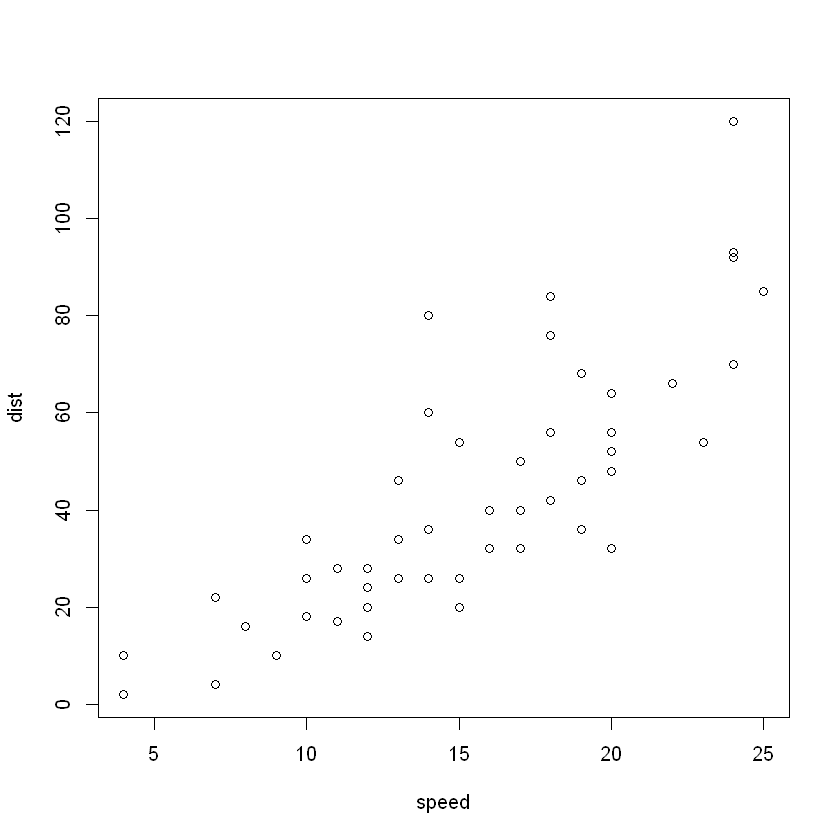

In [40]:
pipeable_plot <- function(data, formula) {
  plot(formula, data)
  # Add a "formula" attribute to data
  attr(data, "formula") <- formula
  invisible(data)
}

# From previous exercise
plt_dist_vs_speed <- cars %>% 
  pipeable_plot(dist ~ speed)

# Examine the structure of the result
str(plt_dist_vs_speed)

You can include metadata in the return value by storing it as attributes.

## Environments

### Creating and exploring environments

Environments are used to store other variables. Mostly, you can think of them as lists, but there's an important extra property that is relevant to writing functions. Every environment has a **parent environment** (except the **empty environment**, at the root of the environment tree). This determines which variables R know about at different places in your code.

In [41]:
national_parks = c('Addo Elephant National Park',
 'Agulhas National Park',
 'Ai-Ais/Richtersveld Transfrontier Park',
 'Augrabies Falls National Park',
 'Bontebok National Park',
 'Camdeboo National Park',
 'Golden Gate Highlands National Park',
 'Hluhluwe–Imfolozi Park',
 'Karoo National Park',
 'Kgalagadi Transfrontier Park',
 'Knysna National Lake Area',
 'Kruger National Park',
 'Mapungubwe National Park',
 'Marakele National Park',
 'Mokala National Park',
 'Mountain Zebra National Park',
 'Namaqua National Park',
 'Table Mountain National Park',
 'Tankwa Karoo National Park',
 'Tsitsikamma National Park',
 'West Coast National Park',
 'Wilderness National Park')

In [42]:
capitals = read_csv("../datasets//capitals.csv")
head(capitals)

Parsed with column specification:
cols(
  city = col_character(),
  type_of_capital = col_character()
)


city,type_of_capital
Cape Town,Legislative
Bloemfontein,Judicial
Pretoria,Administrative


In [43]:
population = ts(data=c(40583573, 44819778, 47390900, 51770560, 55908900), start=1996, end=2016, frequency=0.2)

In [44]:
# Add capitals, national_parks, & population to a named list
rsa_lst <- list(
  capitals = capitals,
  national_parks = national_parks,
  population = population
)

# List the structure of each element of rsa_lst
ls.str(rsa_lst)

capitals : tibble [3 x 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
national_parks :  chr [1:22] "Addo Elephant National Park" "Agulhas National Park" ...
population :  Time-Series [1:5] from 1996 to 2016: 40583573 44819778 47390900 51770560 55908900

In [45]:
# Convert the list to an environment
rsa_env <- list2env(rsa_lst)

# List the structure of each variable
ls.str(rsa_env)

capitals : tibble [3 x 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
national_parks :  chr [1:22] "Addo Elephant National Park" "Agulhas National Park" ...
population :  Time-Series [1:5] from 1996 to 2016: 40583573 44819778 47390900 51770560 55908900

In [46]:
# Find the parent environment of rsa_env
parent <- parent.env(rsa_env)

# Print its name
environmentName(parent)

[1] "R_GlobalEnv"

The parent of the environment we defined is the global environment. Fun fact: South Africa has more capital cities than any other country.

### Do variables exist?



In [47]:
# Compare the contents of the global environment and rsa_env
ls.str(globalenv())
ls.str(rsa_env)

# Does population exist in rsa_env?
exists("population", envir = rsa_env)

# Does population exist in rsa_env, ignoring inheritance?
exists("population", envir=rsa_env, inherits=FALSE)

calc_harmonic_mean : function (x, na.rm = FALSE)  
capitals : tibble [3 x 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
cff : tibble [7 x 5] (S3: tbl_df/tbl/data.frame)
coin_sides :  chr [1:2] "head" "tail"
cut_by_quantile : function (x, n = 5, na.rm = FALSE, labels = NULL, interval_type = c("(lo, hi]", 
    "[lo, hi)"))  
get_reciprocal : function (x)  
gold_medals :  Named num [1:87] 46 27 26 19 17 12 10 9 8 8 ...
groom_model : function (model)  
is_leap_year : function (year)  
mdl : tibble [1 x 7] (S3: tbl_df/tbl/data.frame)
model : List of 31
 $ coefficients     : Named num [1:7] 4.0864 0.374 -0.0199 -0.5807 -0.5782 ...
 $ residuals        : Named num [1:346] -0.535 -0.768 -0.944 -0.662 -0.767 ...
 $ fitted.values    : Named num [1:346] 4.3 4.3 17.83 2.96 4.29 ...
 $ effects          : Named num [1:346] -360 -29.2 20.3 -10 23.4 ...
 $ R                : num [1:7, 1:7] -97.4 0 0 0 0 ...
 $ rank             : int 7
 $ qr               :List of 5
 $ family           :List of 12
 $ linea

capitals : tibble [3 x 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
national_parks :  chr [1:22] "Addo Elephant National Park" "Agulhas National Park" ...
population :  Time-Series [1:5] from 1996 to 2016: 40583573 44819778 47390900 51770560 55908900

[1] TRUE

[1] TRUE

If R cannot find a variable in the current environment, it will look in the parent environment, then the grandparent environment, and so on until it finds it.

## Scope and precedence

* When a variable is defined inside the function, you can't access it from outside the function.
* When a variable is defined outside the function in the global environment, it can still be used inside the function.
* Variables inside functions take precedence over variables outside functions.
* Variables inside functions can override variables passed to functions.

## Case study on grain yields

 data preparation, visualization, and modeling.

### Grain yields and unit conversion

We'll be working with [grain yield data](https://www.rdocumentation.org/packages/agridat/topics/nass.corn) from the [United States Department of Agriculture, National Agricultural Statistics Service](http://quickstats.nass.usda.gov/). Unfortunately, they report all areas in acres. So, the first thing we need to do is write some utility functions to convert areas in acres to areas in hectares.

* There are 4840 square yards in an acre.
* There are 36 inches in a yard and one inch is 0.0254 meters.
* There are 10000 square meters in a hectare.

In [48]:
# Write a function to convert acres to sq. yards
acres_to_sq_yards <- function(acres) {
  acres * 4840
}

In [49]:
# Write a function to convert yards to meters
yards_to_meters <- function(yards){
  yards * 36 * 0.0254
}

In [50]:
# Write a function to convert sq. meters to hectares
sq_meters_to_hectares <- function(sq_meters){
  sq_meters/10000
}

### Converting areas to metric 2

We need another utility function to deal with getting from square yards to square meters. Then, we can bring everything together to write the overall acres-to-hectares conversion function. We'll be calculating area conversions in the denominator of a ratio, so we'll need a harmonic acre-to-hectare conversion function.

In [51]:
# Write a function to convert sq. yards to sq. meters
sq_yards_to_sq_meters <- function(sq_yards) {
  sq_yards %>%
    # Take the square root
    sqrt() %>%
    # Convert yards to meters
    yards_to_meters() %>%
    # Square it
    raise_to_power(2)
}

In [52]:
# load_step2 <- function() {
#   assign(
#     "sq_yards_to_sq_meters",
#     function(sq_yards) {
#       sq_yards %>% 
#         sqrt() %>% 
#         yards_to_meters() %>% 
#         raise_to_power(2)
#     },
#     envir = globalenv()
#   )
# }

# Load the function from the previous step
# load_step2()

# Write a function to convert acres to hectares
acres_to_hectares <- function(acres) {
  acres %>%
    # Convert acres to sq yards
    acres_to_sq_yards() %>%
    # Convert sq yards to sq meters
    sq_yards_to_sq_meters() %>%
    # Convert sq meters to hectares
    sq_meters_to_hectares()
}

In [53]:
# load_step3 <- function() {
#   assign(
#     "acres_to_hectares",
#     function(acres) {
#       acres %>%
#         acres_to_sq_yards() %>%
#         sq_yards_to_sq_meters() %>%
#         sq_meters_to_hectares()
#     },
#     envir = globalenv()
#   )
# }
# Load the functions from the previous steps
#load_step3()

# Define a harmonic acres to hectares function
harmonic_acres_to_hectares <- function(acres) {
  acres %>% 
    # Get the reciprocal
    get_reciprocal %>%
    # Convert acres to hectares
    acres_to_hectares %>% 
    # Get the reciprocal again
    get_reciprocal
}

### Converting yields to metric

The yields in the NASS corn data are also given in US units, namely bushels per acre. We'll need to write some more utility functions to convert this unit to the metric unit of kg per hectare.

Bushels historically meant a volume of 8 gallons, but in the context of grain, they are now defined as masses. This mass differs for each grain!

1. One pound (lb) is 0.45359237 kilograms (kg).
2. One bushel is 48 lbs of barley, 56 lbs of corn, or 60 lbs of wheat

In [54]:
# Write a function to convert lb to kg
lbs_to_kgs <- function(lbs){
  lbs*0.45359237
}

In [55]:
# Write a function to convert bushels to lbs
bushels_to_lbs <- function(bushels, crop) {
  # Define a lookup table of scale factors
  c(barley = 48, corn = 56, wheat = 60) %>%
    # Extract the value for the crop
    extract(crop) %>%
    # Multiply by the no. of bushels
    multiply_by(bushels)
}

In [56]:
# load_step3 <- function() {
#   assign(
#     "bushels_to_lbs",
#     function(bushels, crop) {
#       c(barley = 48, corn = 56, wheat = 60) %>%
#         extract(crop) %>%
#         multiply_by(bushels)
#     },
#     envir = globalenv()
#   )
#   assign(
#     "lbs_to_kgs",
#     function(lbs) {
#       0.45359237 * lbs
#     },
#     envir = globalenv()
#   )
# }
# Load fns defined in previous steps
#load_step3()

# Write a function to convert bushels to kg
bushels_to_kgs <- function(bushels, crop) {
  bushels %>%
    # Convert bushels to lbs for this crop
    bushels_to_lbs(crop) %>%
    # Convert lbs to kgs
    lbs_to_kgs()
}

In [57]:
# load_step4 <-function() {
#   load_step3()
#   assign(
#     "bushels_to_kgs",
#     function(bushels, crop) {
#       bushels %>% 
#         bushels_to_lbs(crop) %>% 
#         lbs_to_kgs()
#     },
#     envir = globalenv()
#   )
# }
# Load fns defined in previous steps
# load_step4()

# Write a function to convert bushels/acre to kg/ha
bushels_per_acre_to_kgs_per_hectare <- function(bushels_per_acre, crop = c("barley", "corn", "wheat")) {
  # Match the crop argument
  crop <- match.arg(crop)
  bushels_per_acre %>%
    # Convert bushels to kgs for this crop
    bushels_to_kgs(crop) %>%
    # Convert harmonic acres to ha
    harmonic_acres_to_hectares()
}

### Applying the unit conversion

Now that we've written some functions, it's time to apply them! The NASS `corn` dataset is available, and we can fortify it (jargon for "adding new columns") with metrics areas and yields.

This fortification process can also be turned in to a function, so we'll define a function for this, and test it on the NASS `heat` dataset.

In [58]:
corn<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5028/datasets/495f9e5fa1ae333cd013568412df4e7c663c2192/nass.corn.rds")))
wheat <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5028/datasets/8dde0453e7b53c630546e5b9723ce279ac6e4901/nass.wheat.rds")))
barley <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5028/datasets/a5eddd39a47abc8efbdb419c54882112dc28785b/nass.barley.rds")))

In [59]:
# View the corn dataset
glimpse(corn)

corn %>%
  # Add some columns
  mutate(
    # Convert farmed area from acres to ha
    farmed_area_ha = acres_to_hectares(corn$farmed_area_acres),
    # Convert yield from bushels/acre to kg/ha
    yield_kg_per_ha = bushels_per_acre_to_kgs_per_hectare(
      corn$yield_bushels_per_acre,
      crop = "corn"
    )
  )

Rows: 6,381
Columns: 4
$ year                   <int> 1866, 1866, 1866, 1866, 1866, 1866, 1866, 18...
$ state                  <chr> "Alabama", "Arkansas", "California", "Connec...
$ farmed_area_acres      <dbl> 1050000, 280000, 42000, 57000, 200000, 12500...
$ yield_bushels_per_acre <dbl> 9.0, 18.0, 28.0, 34.0, 23.0, 9.0, 6.0, 29.0,...


year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha
1866,Alabama,1050000,9.0,424919.924,564.9090
1866,Arkansas,280000,18.0,113311.980,1129.8180
1866,California,42000,28.0,16996.797,1757.4946
1866,Connecticut,57000,34.0,23067.082,2134.1006
1866,Delaware,200000,23.0,80937.128,1443.6563
1866,Florida,125000,9.0,50585.705,564.9090
1866,Georgia,1770000,6.0,716293.587,376.6060
1866,Illinois,4925000,29.0,1993076.788,1820.2623
1866,Indiana,1950000,36.5,789137.002,2291.0198
1866,Iowa,1810000,32.0,732481.012,2008.5653


In [60]:
# Wrap this code into a function
fortify_with_metric_units <- function(data, crop){
  data %>%
    mutate(
      farmed_area_ha = acres_to_hectares(farmed_area_acres),
      yield_kg_per_ha = bushels_per_acre_to_kgs_per_hectare(
        yield_bushels_per_acre, 
        crop = crop
      )
    )
}

# Try it on the wheat dataset
fortify_with_metric_units(wheat, "wheat")

year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha
1866,Alabama,125000,5.0,50585.7053,336.2553
1866,Arkansas,50000,6.5,20234.2821,437.1320
1866,California,650000,18.0,263045.6675,1210.5192
1866,Connecticut,2000,17.5,809.3713,1176.8937
1866,Delaware,59000,11.0,23876.4529,739.7618
1866,Georgia,245000,4.0,99147.9823,269.0043
1866,Illinois,2300000,10.5,930776.9772,706.1362
1866,Indiana,1550000,10.0,627262.7455,672.5107
1866,Iowa,1190000,13.0,481575.9143,874.2639
1866,Kansas,68000,19.0,27518.6237,1277.7703


## Visualizing grain yields

Now that the units have been dealt with, it's time to explore the datasets. An obvious question to ask about each crop is, "how do the yields change over time in each US state?" Let's draw a line plot to find out!

In [61]:
head(corn)

year,state,farmed_area_acres,yield_bushels_per_acre
1866,Alabama,1050000,9
1866,Arkansas,280000,18
1866,California,42000,28
1866,Connecticut,57000,34
1866,Delaware,200000,23
1866,Florida,125000,9


In [62]:
corn <- fortify_with_metric_units(corn, "corn")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


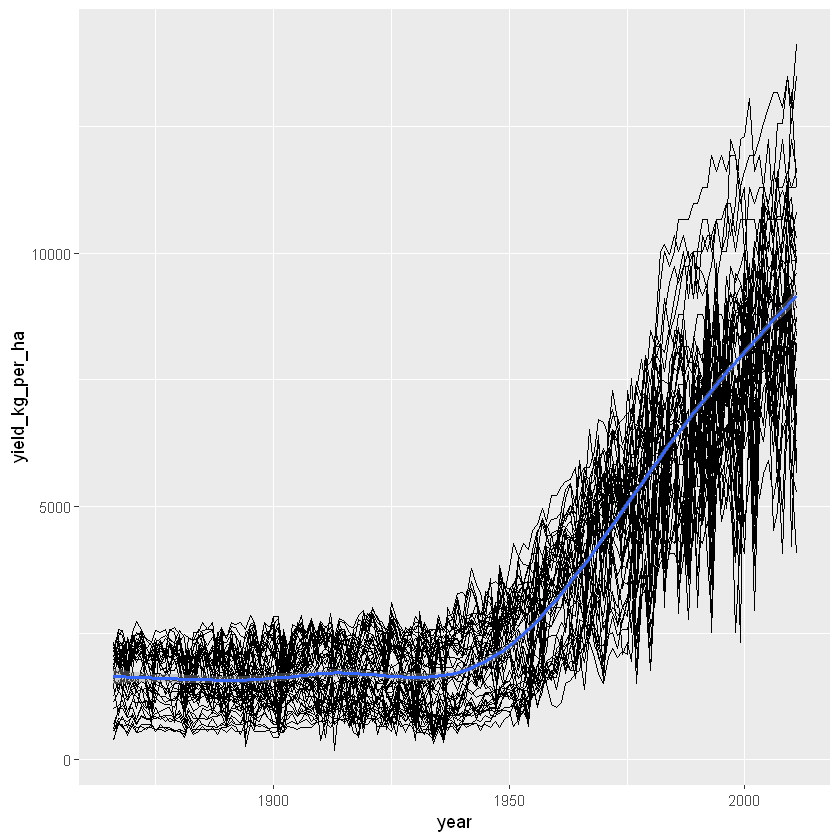

In [63]:
# Using corn, plot yield (kg/ha) vs. year
ggplot(corn, aes(year, yield_kg_per_ha)) +
  # Add a line layer, grouped by state
  geom_line(aes(group = state)) +
  # Add a smooth trend layer
  geom_smooth()

In [67]:
barley <- fortify_with_metric_units(barley, "barley")
head(barley)

year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha
1866,Connecticut,1000,22.5,404.6856,1210.519
1866,Illinois,96000,23.4,38849.8217,1258.940
1866,Indiana,11000,23.0,4451.5421,1237.420
1866,Iowa,66000,22.0,26709.2524,1183.619
1866,Kansas,2000,23.0,809.3713,1237.420
1866,Kentucky,10000,23.5,4046.8564,1264.320


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


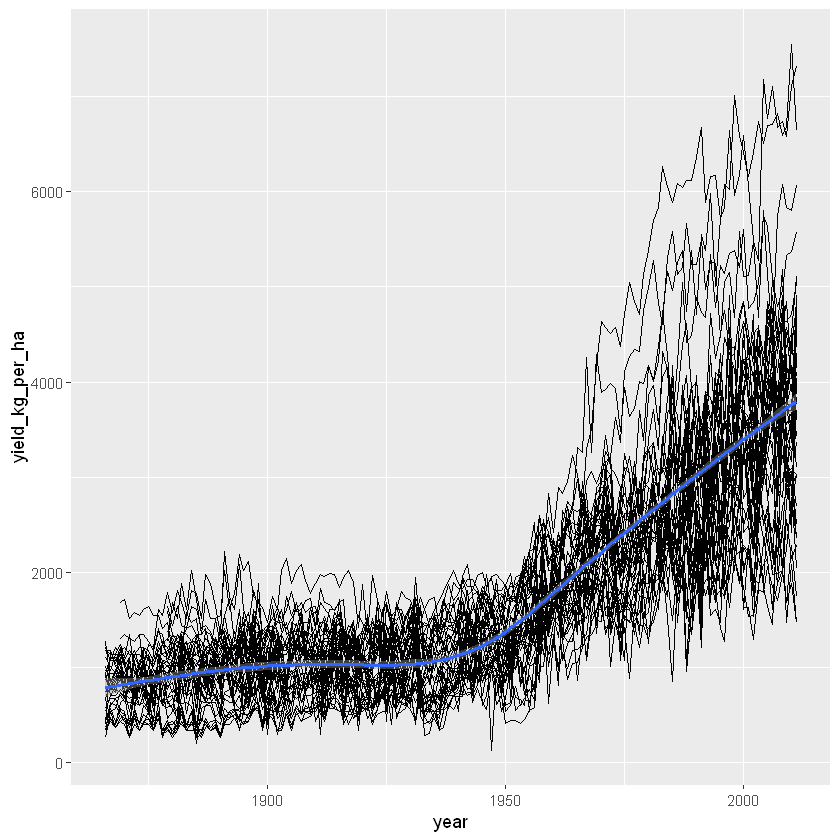

In [64]:
wheat <- fortify_with_metric_units(wheat, "wheat")
# Wrap this plotting code into a function
plot_yield_vs_year <- function(data){
  ggplot(data, aes(year, yield_kg_per_ha)) +
    geom_line(aes(group = state)) +
    geom_smooth()
}

# Test it on the wheat dataset
plot_yield_vs_year(wheat)

Look at the huge increase in yields from the time of the Green Revolution in the 1950s.

### A nation divided

The USA has a varied climate, so we might expect yields to differ between states. Rather than trying to reason about 50 states separately, we can use the USA Census Regions to get 9 groups.

The "Corn Belt", where most US corn is grown is in the "West North Central" and "East North Central" regions. The "Wheat Belt" is in the "West South Central" region.

In [65]:
usa_census_regions <- read_csv("../datasets//usa_census_regions.csv")
head(usa_census_regions)

Parsed with column specification:
cols(
  census_region = col_character(),
  state = col_character()
)


census_region,state
New England,Connecticut
New England,Maine
New England,Massachusetts
New England,New Hampshire
New England,Rhode Island
New England,Vermont


In [66]:
# Inner join the corn dataset to usa_census_regions by state
corn %>%
  inner_join(usa_census_regions, by = "state")

year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha,census_region
1866,Alabama,1050000,9.0,424919.924,564.9090,East South Central
1866,Arkansas,280000,18.0,113311.980,1129.8180,West South Central
1866,California,42000,28.0,16996.797,1757.4946,Pacific
1866,Connecticut,57000,34.0,23067.082,2134.1006,New England
1866,Delaware,200000,23.0,80937.128,1443.6563,South Atlantic
1866,Florida,125000,9.0,50585.705,564.9090,South Atlantic
1866,Georgia,1770000,6.0,716293.587,376.6060,South Atlantic
1866,Illinois,4925000,29.0,1993076.788,1820.2623,East North Central
1866,Indiana,1950000,36.5,789137.002,2291.0198,East North Central
1866,Iowa,1810000,32.0,732481.012,2008.5653,West North Central


In [68]:
# Wrap this code into a function
fortify_with_census_region <- function(data){
  data %>%
    inner_join(usa_census_regions, by = "state")
}

# Try it on the wheat dataset
fortify_with_census_region(wheat)

corn <- fortify_with_census_region(corn)
wheat <- fortify_with_census_region(wheat)
barley <- fortify_with_census_region(barley)

year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha,census_region
1866,Alabama,125000,5.0,50585.7053,336.2553,East South Central
1866,Arkansas,50000,6.5,20234.2821,437.1320,West South Central
1866,California,650000,18.0,263045.6675,1210.5192,Pacific
1866,Connecticut,2000,17.5,809.3713,1176.8937,New England
1866,Delaware,59000,11.0,23876.4529,739.7618,South Atlantic
1866,Georgia,245000,4.0,99147.9823,269.0043,South Atlantic
1866,Illinois,2300000,10.5,930776.9772,706.1362,East North Central
1866,Indiana,1550000,10.0,627262.7455,672.5107,East North Central
1866,Iowa,1190000,13.0,481575.9143,874.2639,West North Central
1866,Kansas,68000,19.0,27518.6237,1277.7703,West North Centra


With the census data incorporated into the crop datasets, we can now look at yield differences between the regions.

### Plotting yields over time by region

So far, we have a function to plot yields over time for each crop, and we've added a `census_region` column to the crop datasets. Now we are ready to look at how the yields change over time in each region of the USA.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


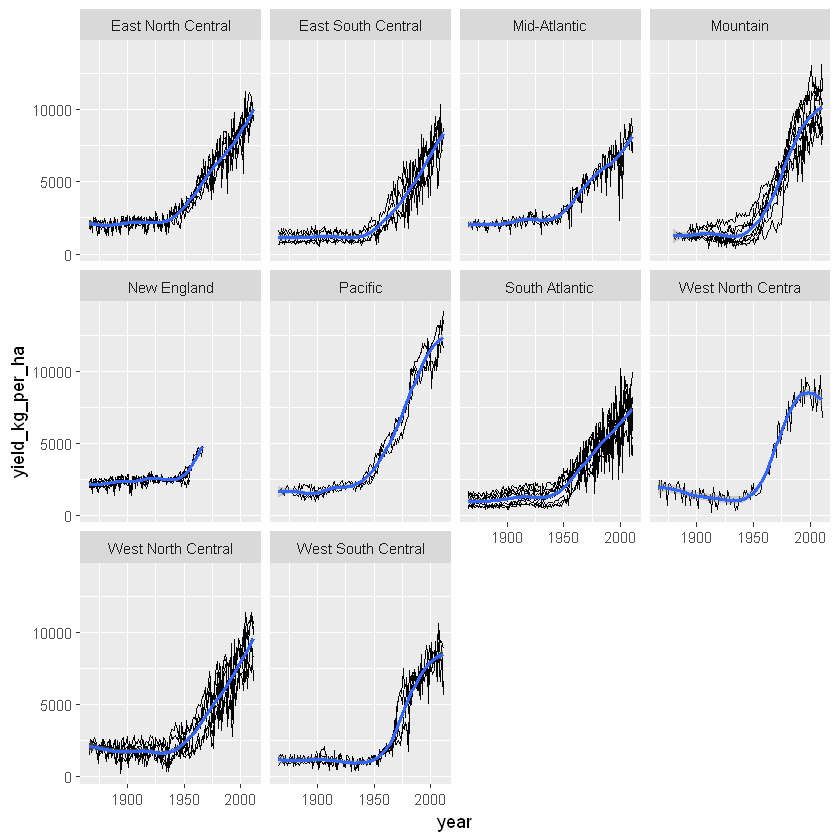

In [69]:
# Plot yield vs. year for the corn dataset
plot_yield_vs_year(corn) +
  # Facet, wrapped by census region
  facet_wrap(vars(census_region))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


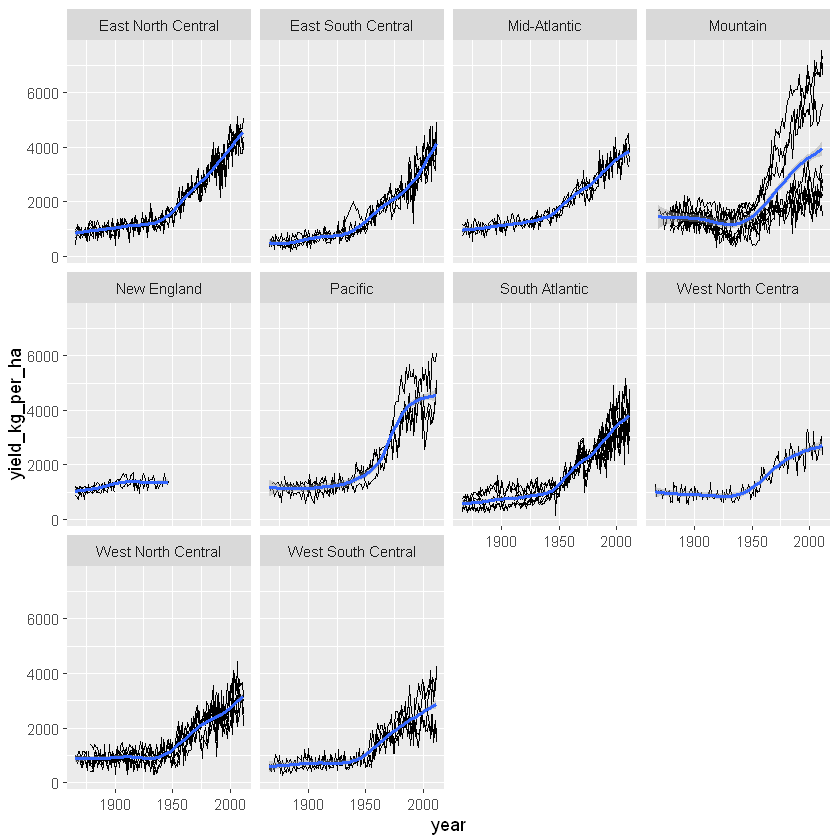

In [70]:
# Wrap this code into a function
plot_yield_vs_year_by_region <- function(data){
  plot_yield_vs_year(data) +
    facet_wrap(vars(census_region))
}

# Try it on the wheat dataset
plot_yield_vs_year_by_region(wheat)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


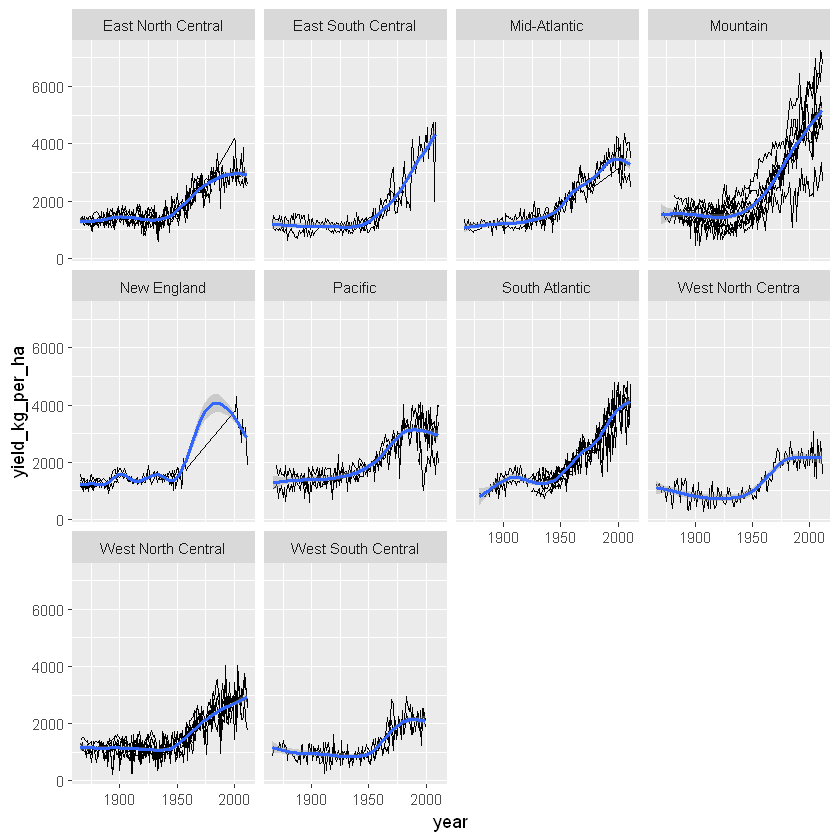

In [71]:
plot_yield_vs_year_by_region(barley)

The corn yields are highest in the West North Central region, the heart of the Corn Belt. For wheat, it looks like the yields are highest in the Wheat Belt (West South Central region) have been overtaken by some other regions.

## Modeling grain yields

### Running a model

The smooth trend line  in the plots of yield over time use a **generalized additive model (GAM)** to determine where the line should lie. This sort of model is ideal for fitting nonlinear curves. So we can make predictions about future yields, let's explicitly run the model. The syntax for running this GAM takes the following form.

```python
gam(response ~ s(explanatory_var1) + explanatory_var2, data = dataset)
```

Here, `s()` means "make the variable smooth", where smooth very roughly means nonlinear.

In [74]:
# Run a generalized additive model of 
# yield vs. smoothed year and census region
gam(yield_kg_per_ha ~ s(year) + census_region, data = corn)


Family: gaussian 
Link function: identity 

Formula:
yield_kg_per_ha ~ s(year) + census_region

Estimated degrees of freedom:
7.64  total = 17.64 

GCV score: 837146     

In [75]:
# Wrap the model code into a function
run_gam_yield_vs_year_by_region <- function(data){
  gam(yield_kg_per_ha ~ s(year) + census_region, data = data)
}

# Try it on the wheat dataset
run_gam_yield_vs_year_by_region(wheat)


Family: gaussian 
Link function: identity 

Formula:
yield_kg_per_ha ~ s(year) + census_region

Estimated degrees of freedom:
7.03  total = 17.03 

GCV score: 316767.2     

In [76]:
run_gam_yield_vs_year_by_region(barley)


Family: gaussian 
Link function: identity 

Formula:
yield_kg_per_ha ~ s(year) + census_region

Estimated degrees of freedom:
8.27  total = 18.27 

GCV score: 226137.9     

Now that we have a function to run the GAMs, let's make some predictions.

### Making yield predictions

The fun part of modeling is using the models to make predictions. We can do this using a call to `predict()`, in the following form.

```python
predict(model, cases_to_predict, type = "response")
```

In [77]:
corn_model = run_gam_yield_vs_year_by_region(corn)
wheat_model = run_gam_yield_vs_year_by_region(wheat)
barley_model = run_gam_yield_vs_year_by_region(barley)

In [79]:
census_regions = c("New England", "Mid-Atlantic", "East North Central", 
                   "West North Central", "South Atlantic", "East South Central",
                  "West South Central", "Mountain", "Pacific")

In [80]:
# Make predictions in 2050  
predict_this <- data.frame(
  year = 2050,
  census_region = census_regions
) 

# Predict the yield
pred_yield_kg_per_ha <- predict(corn_model, predict_this, type = "response")

predict_this %>%
  # Add the prediction as a column of predict_this 
  mutate(pred_yield_kg_per_ha = predict(corn_model, predict_this, type = "response"))

year,census_region,pred_yield_kg_per_ha
2050,New England,13971.74
2050,Mid-Atlantic,13483.16
2050,East North Central,13858.71
2050,West North Central,13272.07
2050,South Atlantic,12517.47
2050,East South Central,12481.80
2050,West South Central,12616.81
2050,Mountain,13360.69
2050,Pacific,14396.32


In [81]:
# Wrap this prediction code into a function
predict_yields <- function(model, year){
  predict_this <- data.frame(
    year = year,
    census_region = census_regions
  ) 
  pred_yield_kg_per_ha <- predict(model, predict_this, type = "response")
  predict_this %>%
    mutate(pred_yield_kg_per_ha = pred_yield_kg_per_ha)
}

# Try it on the wheat dataset
predict_yields(wheat_model, 2050)

year,census_region,pred_yield_kg_per_ha
2050,New England,5506.225
2050,Mid-Atlantic,5425.524
2050,East North Central,5469.977
2050,West North Central,4989.062
2050,South Atlantic,5079.494
2050,East South Central,4985.727
2050,West South Central,4764.270
2050,Mountain,5457.732
2050,Pacific,5707.704


In [82]:
predict_yields(barley_model, 2090)

year,census_region,pred_yield_kg_per_ha
2090,New England,4813.040
2090,Mid-Atlantic,4830.564
2090,East North Central,4793.858
2090,West North Central,4479.566
2090,South Atlantic,4831.618
2090,East South Central,4599.288
2090,West South Central,4222.323
2090,Mountain,5222.106
2090,Pacific,4850.937


The models predict that in 2050, the highest yields will be in the Pacific region for both corn and wheat. Here (for barley dataset) we can see that yields are highest in the Mountain region, and the model predicts that this will still be the case in 2090.